# ARIMA and Seasonal ARIMA

In [30]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
%matplotlib inline

from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from pmdarima import auto_arima

In [2]:
data = pd.read_csv("datasets/perrin-freres-monthly-champagne-.csv")
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


the data is about how much champagne was produced every month from year 1964 to 1972

In [3]:
data.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [4]:
data["Month"].unique() 

array(['1964-01', '1964-02', '1964-03', '1964-04', '1964-05', '1964-06',
       '1964-07', '1964-08', '1964-09', '1964-10', '1964-11', '1964-12',
       '1965-01', '1965-02', '1965-03', '1965-04', '1965-05', '1965-06',
       '1965-07', '1965-08', '1965-09', '1965-10', '1965-11', '1965-12',
       '1966-01', '1966-02', '1966-03', '1966-04', '1966-05', '1966-06',
       '1966-07', '1966-08', '1966-09', '1966-10', '1966-11', '1966-12',
       '1967-01', '1967-02', '1967-03', '1967-04', '1967-05', '1967-06',
       '1967-07', '1967-08', '1967-09', '1967-10', '1967-11', '1967-12',
       '1968-01', '1968-02', '1968-03', '1968-04', '1968-05', '1968-06',
       '1968-07', '1968-08', '1968-09', '1968-10', '1968-11', '1968-12',
       '1969-01', '1969-02', '1969-03', '1969-04', '1969-05', '1969-06',
       '1969-07', '1969-08', '1969-09', '1969-10', '1969-11', '1969-12',
       '1970-01', '1970-02', '1970-03', '1970-04', '1970-05', '1970-06',
       '1970-07', '1970-08', '1970-09', '1970-10', 

Month columns has 1 null value with a value which is not date

In [5]:
data.columns=["Month","Sales"] # changing the column name
data.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


dropping last two rows which are not relevant 

In [6]:
data.drop(106,axis=0,inplace=True)
data.drop(105,axis=0,inplace=True)
data.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [7]:
data["Month"].dtype

dtype('O')

In [8]:
data["Month"] = pd.to_datetime(data["Month"])

In [9]:
data.set_index("Month",inplace=True)

In [10]:
data.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


# Visualization of Data 

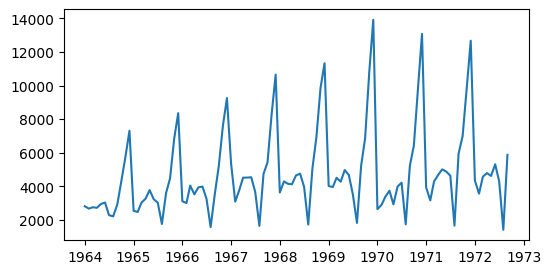

In [11]:
plt.figure(figsize=(6,3))
plt.plot(data)

Data looks seaosonal

<Figure size 600x300 with 0 Axes>

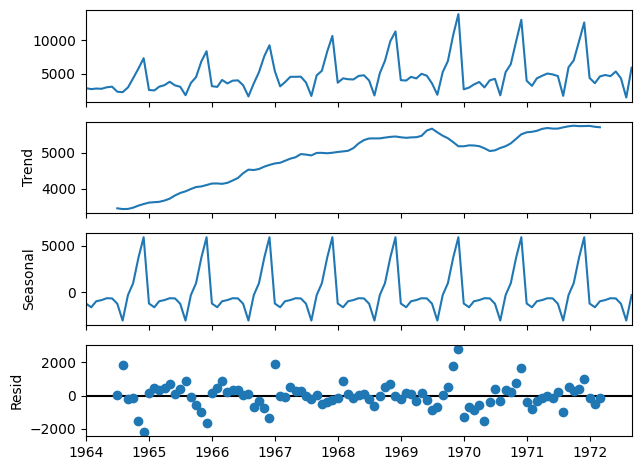

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose 

plt.figure(figsize=(6,3))
decompose = seasonal_decompose(data,model="additive")
decompose.plot()
plt.show()

# Lets see whether the data is stationary or not 

In [13]:
adf = adfuller(data)
adf[1] # p>0.05 means not stationary

0.36391577166024813

In [14]:
kpss = kpss(data)
kpss[1] # p<0.05 means not stationary

0.03881258598340056

# First order differencing 

In [15]:
data["fod"] = data["Sales"] - data["Sales"].shift(1)

In [16]:
data.head()

,Sales,fod
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


AS we know that our data is seasonal we will do a seasonal differencing of 12 months 

In [17]:
data["sfod"] = data["Sales"] - data["Sales"].shift(12)

In [18]:
data.head(15)

,Sales,fod,sfod
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [19]:
adf_sfod = adfuller(data["sfod"].dropna())
adf_sfod[1] # p>0.05 means not stationary

2.060579696813685e-11

In [20]:
from statsmodels.tsa.stattools import adfuller,kpss
kpss_sfod = kpss(data["sfod"].dropna())
kpss_sfod[1] # p<0.05 means not stationary

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_3431/2679223846.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_sfod = kpss(data["sfod"].dropna())


0.1

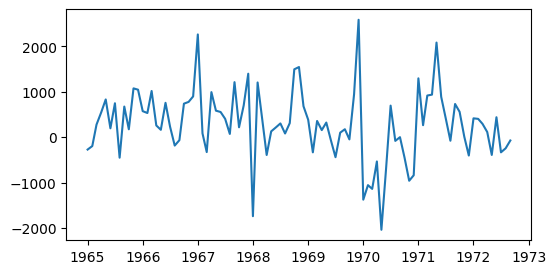

In [21]:
plt.figure(figsize=(6,3))
plt.plot(data["sfod"])

Almost stationary

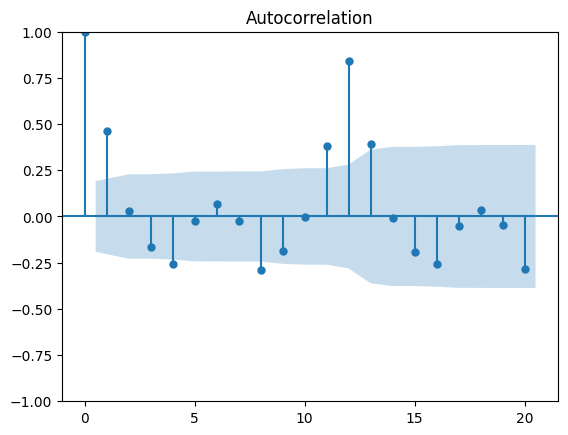

In [22]:
acf = plot_acf(data["Sales"],lags=20)
plt.show()

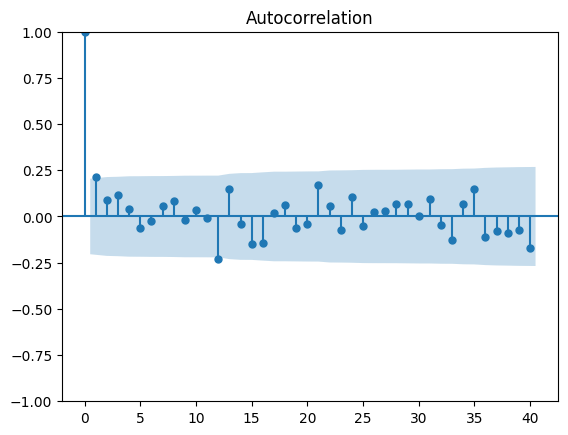

In [23]:
acf_sfod = plot_acf(data["sfod"].iloc[13:],lags=40)
plt.show()

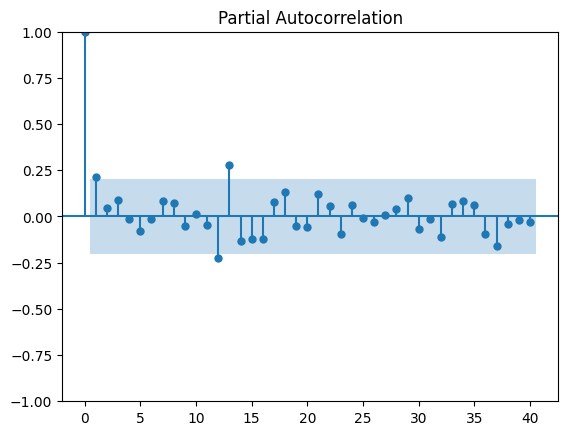

In [24]:
pacf_sfod = plot_pacf(data["sfod"].dropna(),lags=40)
plt.show()

In [25]:
q = 1  
p = 1  
d = 1

# ARIMA shd not be used when the series is stationary remember this 

In [ ]:
model = ARIMA(df["Sales"],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Sun, 23 Mar 2025   AIC                           1911.627
Time:                        18:19:56   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

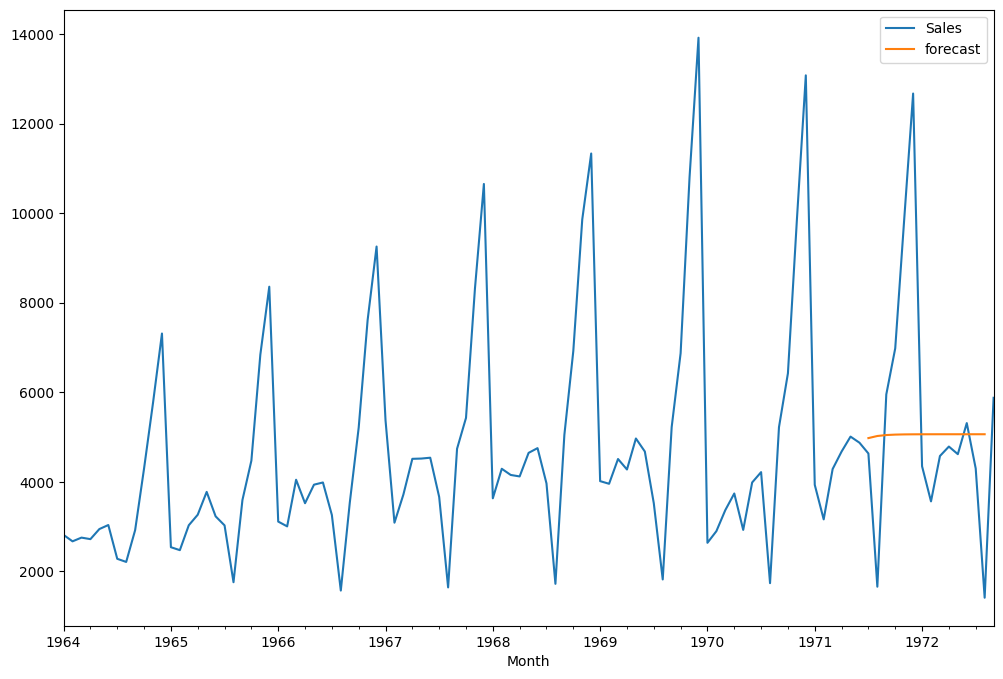

In [29]:
data['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
data[['Sales','forecast']].plot(figsize=(12,8))

forecasting is not at all capturing seasonality which is why we never use ARIMA when the series is stationary

In [32]:
auto_model = auto_arima(data["Sales"], seasonal=True, m=12, trace=True, suppress_warnings=True)
p,q,d = auto_model.order
P,Q,D,m = auto_model.seasonal_order 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1505.396, Time=1.03 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1500.884, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1498.757, Time=0.07 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1498.942, Time=0.16 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1511.271, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1499.959, Time=0.02 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1499.625, Time=0.16 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1500.741, Time=0.11 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1499.028, Time=0.06 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1501.490, Time=0.29 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1500.866, Time=0.10 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1500.295, Time=0.20 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1500.747, Time=0.09 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1498.167, Time=0.22 sec
 ARIMA(0,0,1)(0,1,0

12 is because we are working on yearly data where seasonality occurs after every 12 months

In [37]:
model = sm.tsa.SARIMAX(data["Sales"], 
                        order=(p,q,d), 
                        seasonal_order=(P,Q,D,m))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [38]:
results=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.15499D+00    |proj g|=  4.19210D-02

At iterate    5    f=  7.15428D+00    |proj g|=  1.90278D-04

At iterate   10    f=  7.15424D+00    |proj g|=  7.07507D-03

At iterate   15    f=  7.15324D+00    |proj g|=  1.11917D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     24      1     0     0   6.166D-06   7.153D+00
  F =   7.1531735511512560     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<Axes: xlabel='Month'>

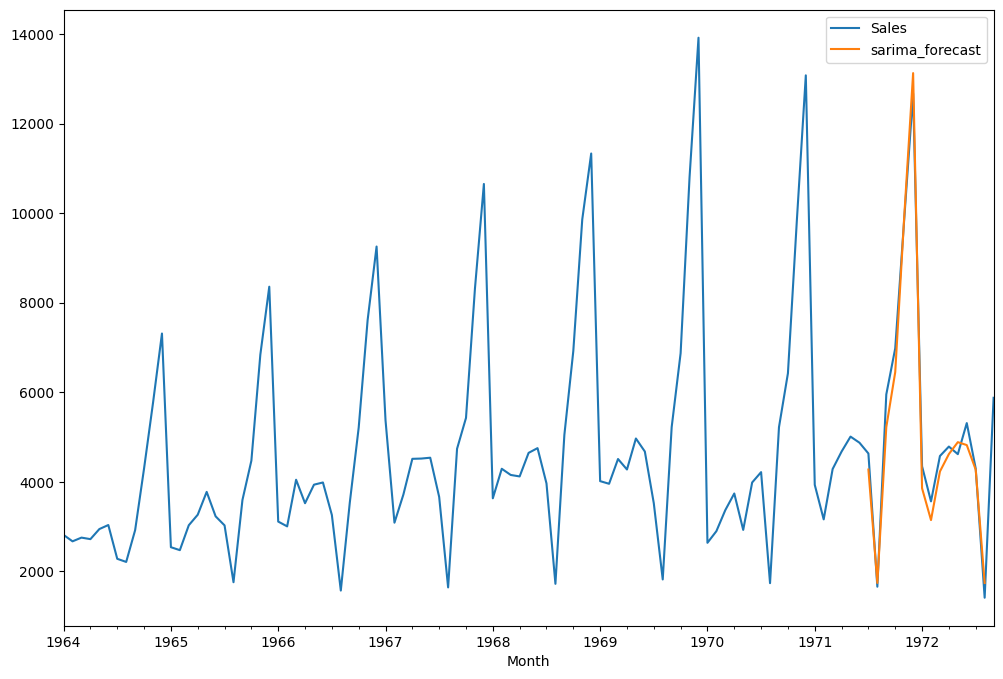

In [39]:
data["sarima_forecast"] = results.predict(start=90, end=103,dynamic=True)
data[['Sales','sarima_forecast']].plot(figsize=(12,8))

In [40]:
future_forecast = model_fit.forecast(steps=24)

In [44]:
future_forecast

1972-10-01     6899.022113
1972-11-01     9848.942235
1972-12-01    12762.828061
1973-01-01     4253.342814
1973-02-01     3472.086501
1973-03-01     4510.465601
1973-04-01     4762.392259
1973-05-01     4707.627094
1973-06-01     5211.855441
1973-07-01     4374.594583
1973-08-01     1469.245574
1973-09-01     5893.919400
1973-10-01     6917.765582
1973-11-01     9849.412724
1973-12-01    12741.603803
1974-01-01     4274.985285
1974-02-01     3493.101653
1974-03-01     4525.678063
1974-04-01     4768.247227
1974-05-01     4687.134706
1974-06-01     5234.752548
1974-07-01     4357.081955
1974-08-01     1456.385555
1974-09-01     5890.050939
Freq: MS, Name: predicted_mean, dtype: float64

In [45]:
last_date = data.index[-1]
future_index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=24, freq='MS')


In [49]:
future_forecast_series = pd.Series(future_forecast,index=future_index)
data = data.reindex(data.index.union(future_index))
data["future_forecast"] = future_forecast_series 

In [50]:
data.tail()

,Sales,fod,sfod,forecast,sarimax_forecast,sarima_forecast,future_forecast
1974-05-01,NaN,NaN,NaN,NaN,NaN,NaN,4687.134706
1974-06-01,NaN,NaN,NaN,NaN,NaN,NaN,5234.752548
1974-07-01,NaN,NaN,NaN,NaN,NaN,NaN,4357.081955
1974-08-01,NaN,NaN,NaN,NaN,NaN,NaN,1456.385555
1974-09-01,NaN,NaN,NaN,NaN,NaN,NaN,5890.050939


<Axes: >

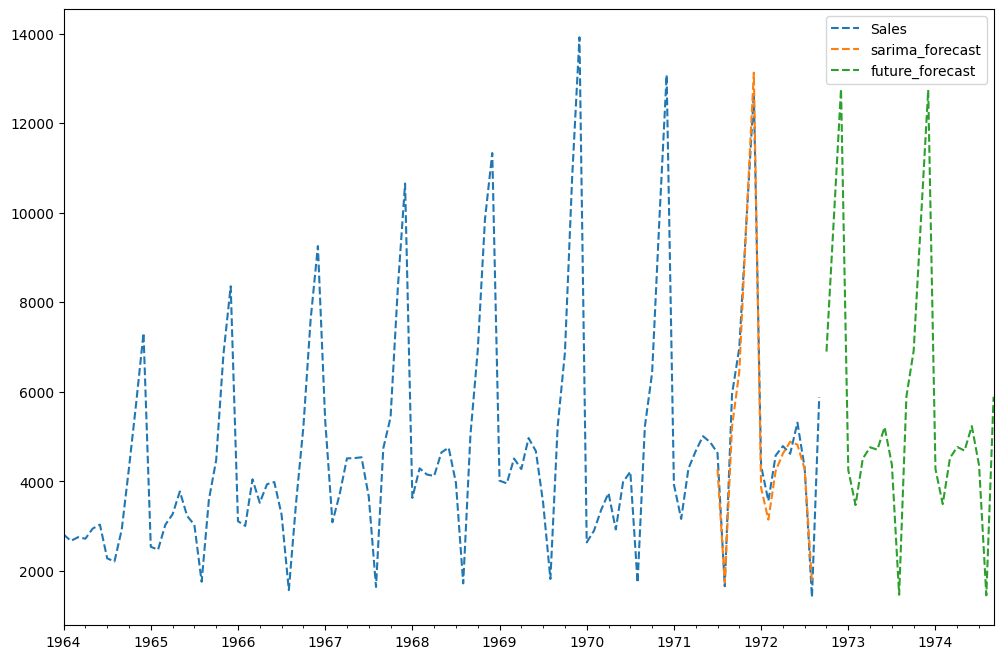

In [51]:
data[['Sales', 'sarima_forecast', 'future_forecast']].plot(figsize=(12,8), linestyle='dashed')